(sec-qubit-measurement)=
# Qubit Measurement

Measuring a physical quantity in quantum mechanics is a bit weird.  I am not going to present a full theory of measurement. If you are interested in it, read Ref. {cite:p}`Audretsch2007`. See also [wikipedia](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics).

## Projective measurement

In classical computer, readout processes determine the outcome of computation stored in each bit.  That is to determine if the state of each bit is $0$ or $1$. The readout can be done at any time without disturbing the state of the bit.  If you repeat the same measurement, the same outcome is obtained.

Similarly, we want to know whether each qubit is in $|0\rangle$ or $|1\rangle$. However, if a qubit is in a superposition state, we have a big problem.  Equation {eq}`qubit-purestate` indicates that the state of the qubit is neither $|0\rangle$ nor $|1\rangle$.  Despite of it, quantum mechanics allows us to ask if the qubit is in $|0\rangle$ or $|1\rangle$ and surprisingly the answer is one of $|0\rangle$ and $|1\rangle$ even it is in the superposition state. Suppose that the outcome of the measurement is $|0\rangle$, it does not mean that the qubit was in $|0\rangle$.  The measurement process has transformed $|psi\rangle$ to $|0\rangle$. This transition is referred as the *collapse of wavefunction*. Mathematically, we say that the state $|\psi\rangle$ is projected to $|0\rangle$ and thus it is called *projective measurement*. See Fig. {numref}`measurement-purestate`.   You may obtain $|1\rangle$ from the same superposition state. Then, $\psi\rangle$ is projected to $|1\rangle$. The measurement of a single qubit seems suggesting that the outcome is not related to the state of the qubit. We never be able to determine the superposition from the outcome. Then, what is the purpose of the measurement?   Even worse, the measurement destroys the superposition state.


```{figure} ./measurement-purestate.png
:name: measurement-purestate
:align: center
:width: 400px

Measurement of a superposition state.  Before measurement, every qubit in the ensemble is in the same superposition state {eq}`qubit-purestate`.  It is known as a purestate ensemble  The measurement selects one of $|0\rangle$ and $|1\rangle$.  As the result, some qubits in the ensemble are in $|0\rangle$ and others in $\1\rangle$. After the measurement, we have a mixed state ensemble.
```

## Born rule

It seems that the outcome is picked at random. The theory of quantum mechanics is powerless if we measure a single qubit.  So, what is the physical meaning of the state vector $|\psi\rangle$?  A resolution was offered by Born. Consider an ensemble of qubits. All qubits in the ensemble are prepared exactly in the same state $|\psi\rangle$ and exactly the same measurement process is applied to them. Some of them are transformed to $|0\rangle$ and others to $|1\rangle$.  It turns out that the probability to obtain $0\rangle$ is $|c_0|^2$ and that of $|1\rangle$ is $|c_1|^2$. This interpretation of the superposition state is known as *Born* rule.  Since we will obtain one of them from each measurement, $|c_0|^2+|c_1|^2=1$, which is satisfied by the normalization condition.


---
## Quantum coin flipping

As an example of the Born rule, we simulate quantum coin flipping.

It is a common practice to pick one of two choices by tossing up a coin.  The classical motion of coin is chaotic and the probability to get head and tail is approximately equal. We can simulate the process on a classical computer using a random number generator.  Such simulation is known as Monte Carlo simulation after the name of the famous casino city.  One can simulate the same process on a quantum computer without random number generator by exploiting the stochastic nature of quantum measurement.  For comparison, both a classical and quantum simulation are presented below.

### Classical simulation

Using `random.choice` function in numpy, we generate random choice of 0=head and 1=tail.  Then, count the number of head and tail.

In [1]:
# Classical Monte Carlo simulation of coin tossing
import numpy as np

# coin is tossed 10000 times for statistical analysis
shots=10000

# generate random choice 0 or 1
# head=0 and tail=1
face = np.random.choice(2,size=shots)

# count number of heads and tails
# if the random number is less than 0.5, it is head.
# otherwise, it is tail.
head = np.sum(face==0)
tail = shots-head

# print out the probabilities
print("head=",head/shots)
print("tail=",tail/shots)

head= 0.508
tail= 0.492


### Quantum simulation

To demonstrate the stochastic nature of quantum measurement, we consider a quantum coin.  The quantum coin has two states, head and tail. We assign the head to $|0\rangle$ and the tail to $|1\rangle$  The superposition state $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ indicates that the state of the quantum coin is neither head nor tail.  Based on the Born rule, the chance to get head is 50% and tail 50%.  Since the outcome is completely random, measuring the state of the quantum coin is equivalent to tossing a classical coin.

In the following qiskit code, the superposition state using a Hadamard gate (we will discuss this in next chapter) and then the state of the qubit is measured.  The result is stored in a classical bit. The quantum computation is simulated with `qasm_simulator` on your computer instead of sending the code to a real quantum computer. (We will send this to real quantum computer in a later chapter.) We repeat the simulation 10000 times and find the probabilities to find head and tail. Since the number of samplings is finite, the result is not exactly 50%-50% but close to  it.

The quantum circuit shows two lines, one for quantum register and the other for classical register.  The classical register contains a bit.  Usually the outcome of measurement on a qubit is stored. The quantum register contains a qubit.  It is initially reset to $|0\rangle$.  The diagram shows that a single-qubit gate $H$ (Hadamard gate) is applied on the qubit.  The outcome is $H |0\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$.  The next gate shows that the state of the qubit is measured and the result, either $0$ or $1$, is sent to the classical register.  In the current example, $0$ or $1$ is obtained with the equal probability. First, we construct a quantum circuit.

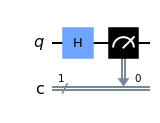

In [2]:
# Tossing Up Quantum Coin

# import numpy
import numpy as np

# import entire qiskit
from qiskit import *

# set classical register (bit)
cr = ClassicalRegister(1,'c')

# set quantum register (qubit)
qr = QuantumRegister(1,'q')

# reset the quantum circuit
qc = QuantumCircuit(qr,cr)

# construct quantum circuit
# step 1: create the superposition state with Hardamard gate
qc.h(0)

# measurement on qubit 
# output is stored in cllasical register
qc.measure(qr,cr)

# show the quantum circuit
qc.draw('mpl')

Now we execute the circuit using a simulator of quantum computer.

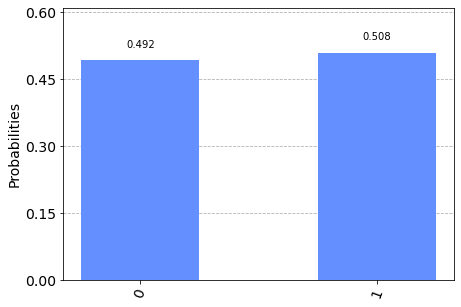

In [3]:
# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.

backend = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit 10000 times
job = backend.run(qc,shots=10000)

# get the result
result = job.result()

# Count the outcome
# Numbers of |0> and |1>
counts = result.get_counts()

# Visualize the outcome
# import histgram plotting function
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# The result should be close to 0.5 for both |0> and |1>.

The outcome is not exactly 50%-50%.  This is because the simulation is executed with a finite shots and thus there is statistical error due to finite sampling.  Theoretically infinite sampling is required but practically it is not possible. However, this is not an issue of quantum computation. 